In [2]:
# import module

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import collections.abc
collections.Iterable = collections.abc.Iterable
from astrodendro import Dendrogram
from astrodendro import structure
import pandas as pd

In [3]:
# load data

d2200 = np.load("datasets/2200.npz")
m2200 = d2200["arr_2"]

rv = d2200['arr_0']
pc = d2200['arr_1']

<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
C:\Users\kotor\AppData\Local\Temp\ipykernel_5788\3595359538.py:27: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('mass [$M_\odot$]')


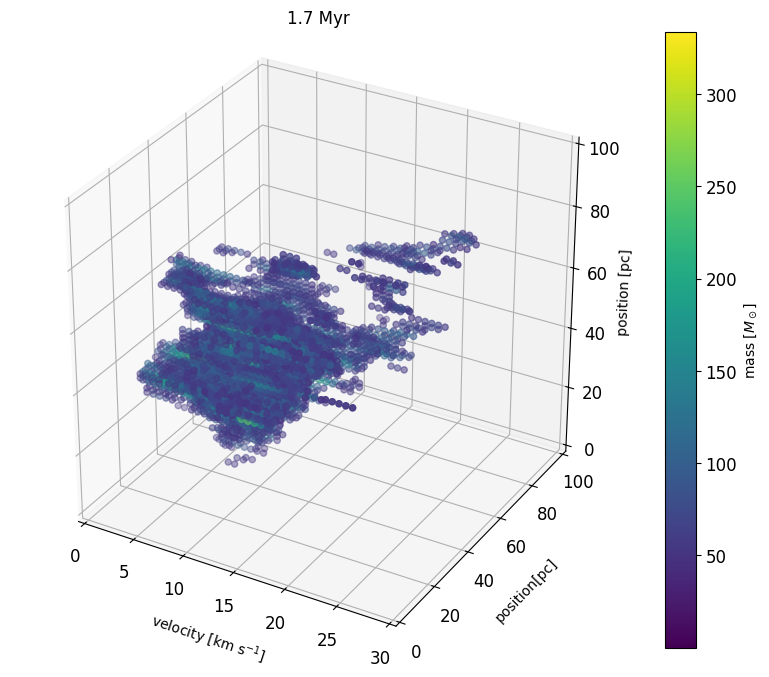

In [4]:
# make 3D map

shape = m2200.shape
gas_mass = m2200.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_mass.min(), gas_mass.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * rv
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * pc
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * pc

threshold = 50
mask= gas_mass > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_mass[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('mass [$M_\odot$]')
cbar.ax.tick_params(labelsize=12)

ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.7 Myr")

X = ax.set_xlabel('velocity [km s$^{-1}$]', labelpad=10)
Y = ax.set_ylabel('position[pc]', labelpad=10)
Z = ax.set_zlabel('position [pc]', labelpad=4)
plt.tick_params(labelsize=12)

#plt.savefig("3Dmap_2200")

In [5]:
# compute dendrogram

dendro3D_2200 = Dendrogram.compute(m2200, min_value=90, min_delta=20, min_npix=50)

In [6]:
# make index

leaf_indices = [i for i, structure in enumerate(dendro3D_2200.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro3D_2200.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)

[0, 1, 4, 6, 7, 8, 9, 10]
[2, 3, 5]


In [7]:
# check the size of structures

leaf_npix, branch_npix = [], []

for structure_index in leaf_indices:
    structure = dendro3D_2200[structure_index]
    npix = structure.get_npix()
    leaf_npix.append(npix)
    
for structure_index in branch_indices:
    structure = dendro3D_2200[structure_index]
    npix = structure.get_npix()
    branch_npix.append(npix)

leaf_sizes = leaf_npix * rv * pc**2
branch_sizes = branch_npix * rv * pc**2

print(leaf_sizes)
print(branch_sizes)

[ 139.50109005 1311.55935556   64.76836324   74.73272681  188.07736248
  198.04172605   73.48718137   80.96045405]
[575.44199646  95.90699941 103.38027209]


In [8]:
# check the mass of structures

mass_per_leaf, mass_per_branch = [], []

for structure_index in leaf_indices:
    structure = dendro3D_2200[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    leaf_mass = np.sum(m2200[indices])
    mass_per_leaf.append(leaf_mass)
    
for structure_index in branch_indices:
    structure = dendro3D_2200[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    branch_mass = np.sum(m2200[indices])
    mass_per_branch.append(branch_mass)

total_mass_leaf = np.sum(mass_per_leaf)
total_mass_branch = np.sum(mass_per_branch)

print(mass_per_leaf)
print(total_mass_leaf)
print(mass_per_branch)
print(total_mass_branch)

[13999.434741931025, 135441.75357605977, 6966.605924471509, 11189.882618815262, 27096.057442319987, 19863.546047963737, 11147.01287934093, 9412.006401174034]
235116.29963207626
[71471.53256579813, 13840.749847832747, 9883.989532200012]
95196.27194583089


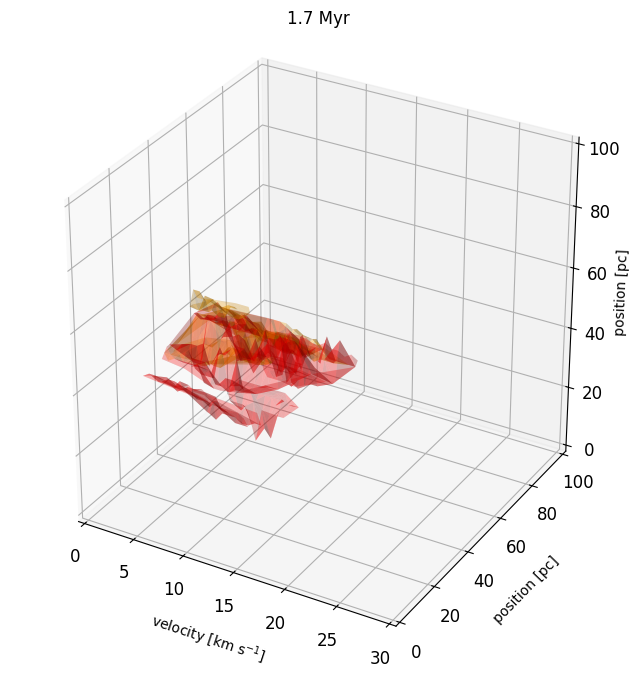

In [9]:
# plot the contour

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro3D_2200[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * rv, indices[1] * pc, indices[2] * pc, color='red', alpha=0.3)
    
for j, structure_index in enumerate(branch_indices):
    structure = dendro3D_2200[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * rv, indices[1] * pc, indices[2] * pc, color='orange', alpha=0.3)

ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.7 Myr")

X = ax.set_xlabel('velocity [km s$^{-1}$]', labelpad=10)
Y = ax.set_ylabel('position [pc]', labelpad=10)
Z = ax.set_zlabel('position [pc]', labelpad=3)
plt.tick_params(labelsize=12)

#plt.savefig("dendro3D_2200_contour")

In [10]:
# make peaks list

x_peak, y_peak, v_peak, peak_value = [], [], [], []
for s in dendro3D_2200.leaves:
    x_ch, y_ch, v_ch = s.get_peak()[0]
    value = s.get_peak()[1]
    x_peak.append(round(float(x_ch), 6))
    y_peak.append(round(float(y_ch), 6))
    v_peak.append(round(float(v_ch), 6))
    peak_value.append(round(float(value), 6))
    
peak = pd.DataFrame({'v_peak':x_peak * rv, 'y_peak':y_peak * pc, 'z_peak':v_peak * pc, 'peak_value':peak_value})

print(peak)

   v_peak     y_peak     z_peak  peak_value
0   10.40  31.838379  24.916992  248.489913
1    7.15  44.296875  35.991211  256.499916
2    3.90  38.759766  24.916992  231.580835
3    4.55  42.912598  52.602539  200.976587
4    5.85  47.065430  44.296875  253.513830
5    8.45  47.065430  23.532715  221.024260
6    8.45  56.755371  35.991211  333.830668
7    9.10  55.371094  33.222656  211.695893


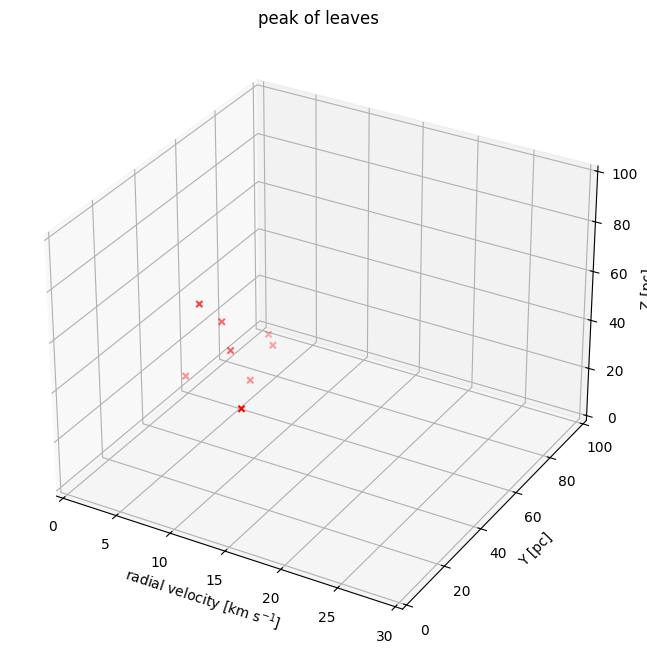

In [11]:
# plot the peaks

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(peak['v_peak'], peak['y_peak'], peak['z_peak'], marker='x', color='red')

ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title('peak of leaves')

X = ax.set_xlabel('radial velocity [km s$^{-1}$]')
Y = ax.set_ylabel('Y [pc]')
Z = ax.set_zlabel('Z [pc]')

#plt.savefig('dendro3D_2200_peak')

In [12]:
# plot by plotly

fig = px.scatter_3d(peak, x='v_peak', y='y_peak', z='z_peak')

# Leaf structures
for i, leaf_structure_index in enumerate(leaf_indices):
    leaf_structure = dendro3D_2200[leaf_structure_index]
    leaf_mask = leaf_structure.get_mask()
    leaf_mask_indices = np.where(leaf_mask)
    mesh_leaf = go.Mesh3d(x=leaf_mask_indices[0] * rv, 
                          y=leaf_mask_indices[1] * pc, 
                          z=leaf_mask_indices[2] * pc, 
                          opacity=0.3,
                          color='red',
                          name=f'Leaf {i + 1} - Surface')
    fig.add_trace(mesh_leaf)

# Branch structures
for j, branch_structure_index in enumerate(branch_indices):
    branch_structure = dendro3D_2200[branch_structure_index]
    branch_mask = branch_structure.get_mask()
    branch_mask_indices = np.where(branch_mask)
    mesh_branch = go.Mesh3d(x=branch_mask_indices[0] * rv, 
                            y=branch_mask_indices[1] * pc, 
                            z=branch_mask_indices[2] * pc,
                            opacity=0.3, 
                            color='orange',
                            name=f'Branch {j + 1} - Surface')
    fig.add_trace(mesh_branch)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='radial velocity [km/s]', range=[0, 30]),
        yaxis=dict(title='Y [pc]', range=[0, 100]),
        zaxis=dict(title='Z [pc]', range=[0, 100]),
        aspectratio=dict(x=1, y=1, z=1)
    ),
    title='Structure Contours in 3D with Mesh Surface',
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True)


In [13]:
# calculate radius

leaf_radius = np.cbrt(3 * (np.array(leaf_sizes)) / (4 * np.pi)) 
branch_radius = np.cbrt(3 * (np.array(branch_sizes)) / (4 * np.pi)) 

print(leaf_radius)
print(branch_radius)

[3.21733535 6.79046914 2.49129279 2.613008   3.55426091 3.61595234
 2.59840989 2.6836638 ]
[5.15985679 2.83957862 2.91149705]


In [14]:
# calculate velocity dispersion

delta_rv_leaf, delta_rv_branch = [], []

for structure_index in leaf_indices:
    structure = dendro3D_2200[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    rv_indices = indices[0] * rv
    delta_rv = np.var(rv_indices)
    delta_rv_leaf.append(delta_rv)
    
for structure_index in branch_indices:
    structure = dendro3D_2200[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    rv_indices = indices[0] * rv
    delta_rv = np.var(rv_indices)
    delta_rv_branch.append(delta_rv)
    
print(delta_rv_leaf)
print(delta_rv_branch)

[9.105171396683673, 8.468950617283951, 2.9550000000000005, 2.947524305555556, 3.6024327880356126, 1.9621741624144617, 1.3979761562769315, 2.0424]
[6.954365360469257, 5.546301231236297, 2.292747858905502]


In [15]:
# calculate virial parameter

alpha_vir_leaf = (1.2 * 10**3 * np.array(leaf_radius) * np.array(delta_rv_leaf)**2 / (3 * np.array(mass_per_leaf)))
alpha_vir_branch = (1.2 * 10**3 * np.array(branch_radius) * np.array(delta_rv_branch)**2 / (3 * np.array(mass_per_branch)))
                     
print(alpha_vir_leaf)
print(alpha_vir_branch)

[7.62117742 1.43835605 1.24904616 0.81150274 0.68091824 0.28035029
 0.1822253  0.47575952]
[1.39662416 2.52441747 0.61937926]


In [16]:
# calculate average of size

leaf_size_ave = np.sum(leaf_sizes) / 8 
branch_size_ave = np.sum(branch_sizes) / 3 

print(leaf_size_ave)
print(branch_size_ave)

266.3910324499011
258.24308931827545


In [19]:
# calculate average of mass

leaf_mass_ave = np.sum(mass_per_leaf) / 8
branch_mass_ave = np.sum(mass_per_branch) / 3

print(leaf_mass_ave)
print(branch_mass_ave)

29389.537454009533
31732.090648610294


In [18]:
# calculate average of vir

leaf_vir_ave = np.sum(alpha_vir_leaf) / 8 
branch_vir_ave = np.sum(alpha_vir_branch) / 3

print(leaf_vir_ave)
print(branch_vir_ave)

1.5924169657485419
1.5134736316778434
